# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [72]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [74]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [75]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [76]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')
data = []
for row in rows:
    cols = row.find_all(['th', 'td'])  
    cols = [ele.text.strip() for ele in cols]  
    data.append(cols)  

for item in data:
    print(item)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [77]:
# Create an empty list
mars_facts = []

# Loop through the scraped data to create a list of rows
rows = table.find_all('tr')
print(f"Number of rows found: {len(rows)}")

for row in rows:
    data_cells = row.find_all('td')

    if data_cells:
      mars_facts.append({
            'id': data_cells[0].text.strip(),  
            'terrestrial_date': data_cells[1].text.strip(),
            'sol': data_cells[2].text.stip(),
            'ls': data_cells[3].text.strip(),
            'month': data_cells[4].text.strip(),
            'min_temp': data_cells[5].text.strip(),
            'pressure': data_cells[6].text.strip()
        })  
    else:
        print("Row missing heading or data:", row)
for item in mars_facts:
    print(item)




Number of rows found: 1868
Row missing heading or data: <tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}
{'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}
{'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}
{'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}
{'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}
{'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}
{'id': '68', 'terrestrial_date': '2012-08-22',

In [78]:
# Create a Pandas DataFrame by using the list of rows and a list of the column namesmars_facts
mars_facts_df = pd.DataFrame(mars_facts)

print(mars_facts_df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [79]:
#Confirm DataFrame was created successfully
print(mars_facts_df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [80]:
# Examine data type of each column
print(mars_facts_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [81]:
# Change data types for data analysis

mars_facts_df['id'] = mars_facts_df['id'].astype(int)

mars_facts_df['sol'] = mars_facts_df['sol'].astype(int)

mars_facts_df['ls'] = mars_facts_df['ls'].astype(int)

mars_facts_df['month'] = mars_facts_df['month'].astype(int)

mars_facts_df['min_temp'] = mars_facts_df['min_temp'].astype(float)

mars_facts_df['pressure'] = mars_facts_df['pressure'].astype(float)

mars_facts_df['terrestrial_date'] = pd.to_datetime(mars_facts_df['terrestrial_date'])

In [82]:
# Confirm type changes were successful by examining data types again
print(mars_facts_df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [117]:
# 1. How many months are there on Mars?
num_months = mars_facts_df['month'].nunique()
print(num_months)

12


In [84]:
# 2. How many sols (Martian days) worth of data are there?
num_martian_days = mars_facts_df.shape[0]
print(num_martian_days)

1867


In [85]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_facts_df.groupby('month')['min_temp'].mean()
print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


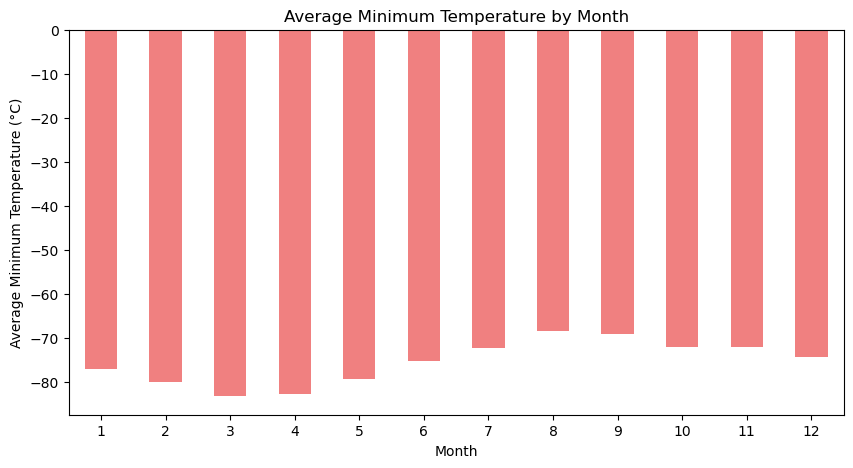

In [112]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 5))
avg_min_temp.plot(kind='bar', color='lightcoral')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0) 
plt.show()

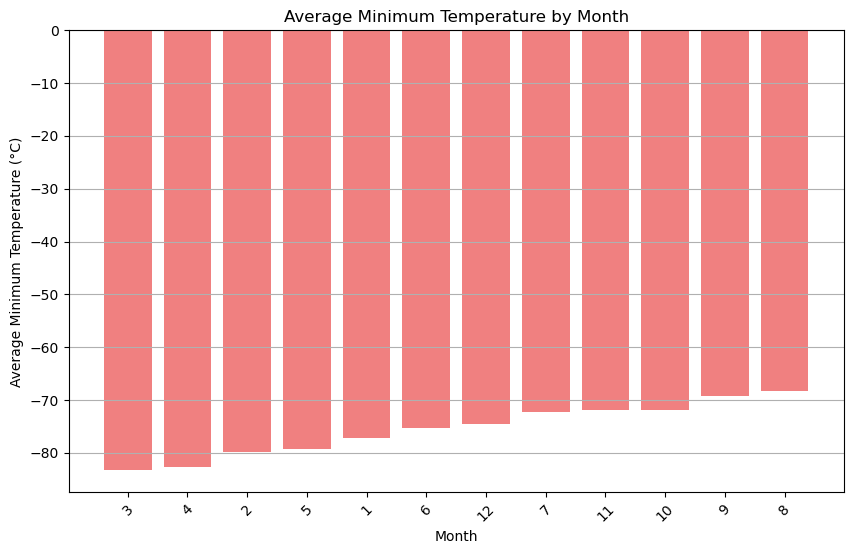

In [111]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

sorted_avg_min_temp = avg_min_temp.sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_avg_min_temp.index.astype(str), sorted_avg_min_temp.values, color='lightcoral')  # Convert index to string for proper labeling
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')

# Show the plot
plt.show()

In [96]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_facts_df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


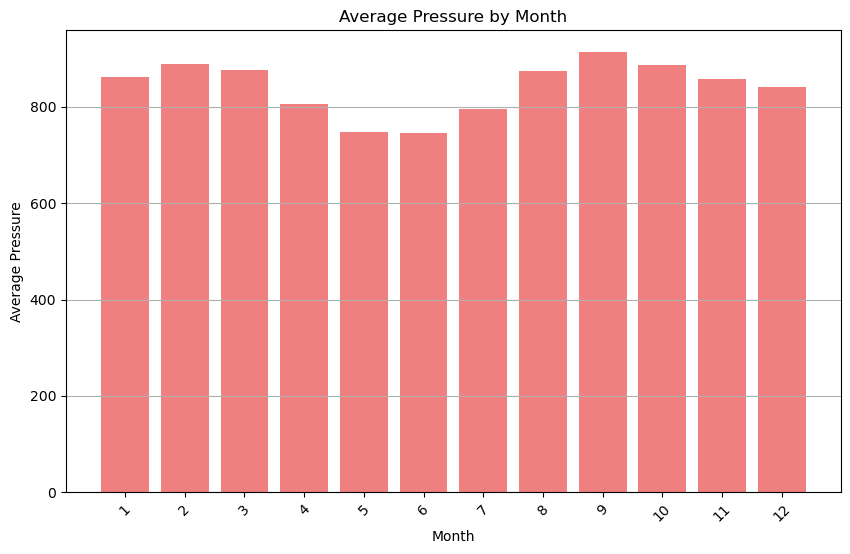

In [110]:
# Plot the average pressure by month
avg_pressure_by_month = mars_facts_df.groupby('month')['pressure'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_pressure_by_month.index.astype(str), avg_pressure_by_month.values, color='lightcoral') 
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=45) 
plt.grid(axis='y')

plt.show()

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


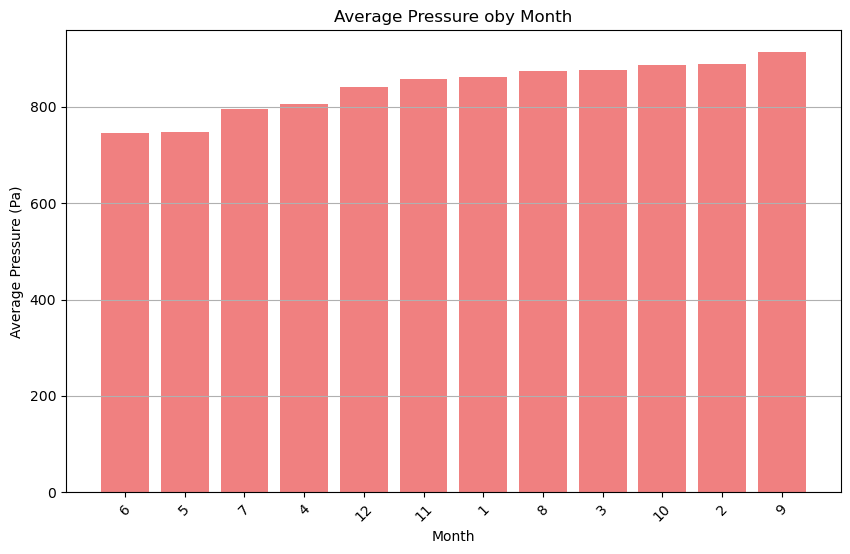

In [109]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_by_month = mars_facts_df.groupby('month')['pressure'].mean()

# Sort the average pressure in ascending order to identify the lowest and highest pressure months
sorted_avg_pressure = avg_pressure_by_month.sort_values(ascending=True)

# Display the sorted results
print(sorted_avg_pressure)

# Create a bar chart for average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(sorted_avg_pressure.index.astype(str), sorted_avg_pressure.values, color='lightcoral')  # Convert index to string for proper labeling
plt.title('Average Pressure oby Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')

# Show the plot
plt.show()

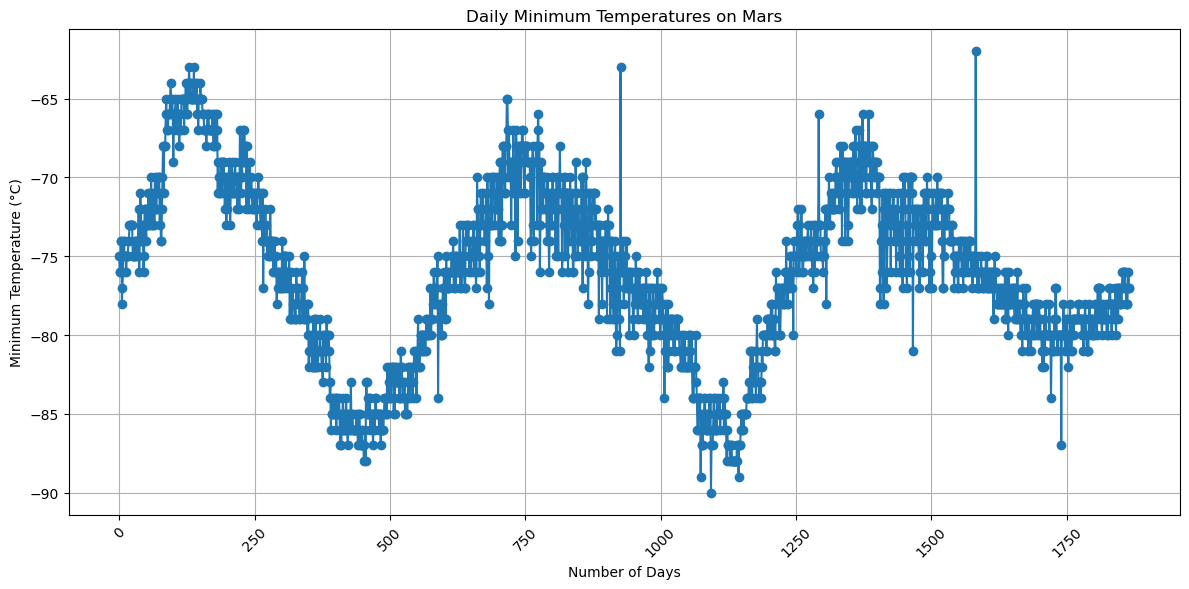

In [124]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


plt.figure(figsize=(12, 6))
plt.plot(mars_facts_df['min_temp'], marker='o', linestyle='-')
plt.title('Daily Minimum Temperatures on Mars')
plt.xlabel('Number of Days')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

#### Minimum Temperature

Which month, on average, has the lowest temperature? The highest?

It would seem the third month of the year has, on average, the lowest temperature on Mars. It would seem the eighth month is, on average, the warmest.

#### Atmospheric Pressure

Which month, on average, has the lowest atmospheric pressure? The highest? 

It would seem the sixth month has, on average, the lowest atmospheric pressure. It would seem, on average, the ninth month has the highest atmospheric pressure.

#### Year Length

How many terrestrial days exist in a Martian year? A visual estimate within 25% was made.

Lookin at the graph, there appears to be roughly 630 days between peaks. According to rmg.co.uk, one there are 687 terrestrial days in a Martian Year, so while close, the graph appears slightly off.

(Source: https://www.rmg.co.uk/stories/topics/how-long-day-on-mars#:~:text=Since%20Mars%20is%20further%20from,less%20than%20two%20Earth%20years.)

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [126]:
# Write the data to a CSV
mars_facts_df.to_csv('data.csv', index=False)

In [127]:
browser.quit()